<h1> Shor's Algorithm at Qiskit </h1>

Seong Cho


This is implementation of Shor's Algorithm at IBM's Qiskit Quantum Lab built via a Jupyter Notebook. 

1. Import

numpy and qiskit elements are imported

In [1]:
#import statements

#numpy 
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ, transpile, Aer, QuantumRegister, ClassicalRegister

#Jupyter tools
from qiskit.tools.jupyter import *

#visualization
from qiskit.visualization import *

#QasmSimulator
from qiskit.providers.aer import QasmSimulator

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


2. Login

IBMQ package is used here to log into IBM Qiskit account

In [2]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

3. Implement

This is the main code. 
    a) a circuit is defined with 5 qubits
    b) 3 qubits go through Hadamard gates into superposed status.
    c) 2 control qubits are linked with the first 3 qubits via CNOT gate
    d) further Hadamard gates and RZZ gates
    e) the first 3 qubits are measured 

In [3]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(4, 'c')
cir = QuantumCircuit(qr, cr)


cir.h(qr[0])
cir.h(qr[1])
cir.h(qr[2])

cir.cx(qr[3], qr[2])
cir.cx(qr[4], qr[2])

cir.h(qr[1])
cir.h(qr[0])

cir.rzz(np.pi / 2, qr[0], qr[1])
cir.rzz(np.pi / 4, qr[1], qr[2])
cir.rzz(np.pi / 2, qr[0], qr[2])

cir.measure(qr[0], cr[0])
cir.measure(qr[1], cr[1])
cir.measure(qr[2], cr[2])

4. Circuit Diagram

The diagram of the circuit is drawn here using the internal "draw()" command

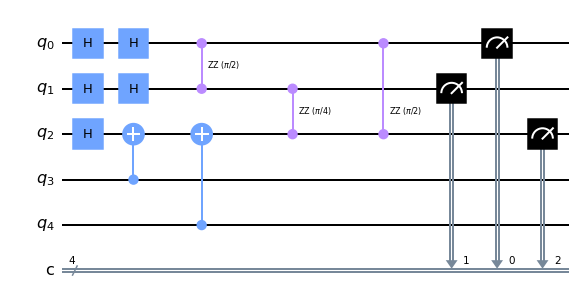

In [4]:
cir.draw()

5. Run

The circuit is now executed at a simulator from Aer package.
qasm_simulator would run this circuit for 4096 times.

The result is visulaized with qiskit.visualization.plot_histogram() method

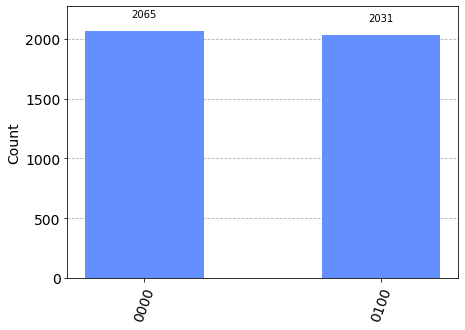

In [5]:
##load qasm_simulator
backend = Aer.get_backend('qasm_simulator')

##run the qasm_simulator with 4096 tries
job = backend.run(transpile(cir, backend), shots=4096)
result = job.result()
counts = result.get_counts(cir)

##visualize the result with qiskit.visualization.plot_histogram
plot_histogram(counts)